# <center>Core concepts of statistical mechanics<center> 

## <center>Ensembles and Particles<center>
    

Authors: Livia Maskos, Professor Bart Hoogenboom

<div class="alert alert-block alert-info">
<b>Outline:</b> <br>
- depiction of microcanonical and canonical ensemble with all possible configurations <br>
- understanding the fundamental distinction between distinguishable and undistinguishable particles. <br> - total energy of the system</div>

*Imports*

In [1]:
%%capture
!conda install -y -q ffmpeg

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import itertools
import matplotlib.animation as animation
from IPython.core.display import HTML
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display
from mpl_toolkits.mplot3d import Axes3D
from itertools import permutations 
from matplotlib.widgets import Slider, Button
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator

<div class="alert alert-block alert-warning">
<b>Default setting<b></div>

In [3]:
lat = 3 # saves the chosen values
M1 = lat - 1 # considering the 0 point
M = lat**2 # number of lattice sites
print('Troughout this notebook, we will consider a %d x %d lattice' %(lat, lat))

Troughout this notebook, we will consider a 3 x 3 lattice


## Table of contents
[Section 1: 1 particle per lattice site](#Configurations-with-1-particle-per-lattice-site) <br>

>[Representation using distinguishable particles](#Distinguishable-particles)<br>

>[Representation using indistinguishable particles](#Indistinguishable-particles) <br>

>[Graphical distinction between distinguishable and indistinguishable particles](#Graphical-visualisation-of-the-distinguishable-indistinguishable-cases) <br>

[Section 2: multiple particles per lattice site](#Multiple-particles-per-lattice-site-using-distinguishable-particles) <br>

>[Representation using distinguishable particles](#Graphical-visualisation-of-the-distinguishable-indistinguishable-cases) <br>

[Section 3: The interaction energy](#Interaction-Energy) <br>

>[Explanation](#Explanation)<br>

>[Calculation](#Interaction-energy-calculation)<br>

[Section 4: The total energy of the system](#The-total-energy-of-the-system) <br>


### Configurations with 1 particle per lattice site

In [32]:
%%capture

# Distinguishable particles

all_configurations=[]
all_totalnum=[]

xi = [*range(0,M1+1)] #possible x coordinates
yi = [*range(0,M1+1)] #possible y coordinates
points = [*itertools.product(xi,yi)] #possible point coordinates

for P in [*range(1,8)]: # consider 1,2,3 particles
    particles = [*range(0, P)] 
    index = 0
    while index < P:
        particles[index] = points # coordinates of individual particles
        index = index + 1
    config = [w for w in [*itertools.product(*particles)] if len(set(w)) == len(w)] # coordinates of particles in configuration
    configuration=[]
    for elem in config:
        l = list(elem)
        configuration.append(l)
    totalnum = len(configuration) # number of possible configurations
    all_configurations.append(configuration) # list with all possible configurations for each case 
    all_totalnum.append(totalnum) # list with all total number of possible microstates for each case 
print(all_totalnum)

fig, (ax1, ax2, ax3) = plt.subplots(1,3) # 3 subplots
ax1.plot()
ax2.plot()
ax3.plot()

ax1.axis('scaled')
ax2.axis('scaled')
ax3.axis('scaled')

def subplot1(): # set up case1 = 1 particle
    ax1.axis('off')
    ax1.set_xlim(-0.5, M1+0.54)
    ax1.set_ylim(-0.54, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step) # set up lattice sites
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax1.axvline(x=xc, color='black', linewidth=1)
        ax1.axhline(y=xc, color='black', linewidth=1)
    
def subplot2(): # set up case2 = 2 particles
    ax2.axis('off')
    ax2.set_xlim(-0.5, M1+0.51)
    ax2.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step) # set up lattice sites
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax2.axvline(x=xc, color='black', linewidth=1)
        ax2.axhline(y=xc, color='black', linewidth=1)
        
def subplot3(): # set up case2 = 3 particles
    ax3.axis('off')
    ax3.set_xlim(-0.5, M1+0.51)
    ax3.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step) # set up lattice sites
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax3.axvline(x=xc, color='black', linewidth=1)
        ax3.axhline(y=xc, color='black', linewidth=1)


configuration1=all_configurations[0] # possible configurations case1       
configuration2=all_configurations[1] # possible configurations case2 
configuration3=all_configurations[2] # possible configurations case3

totalnum1=all_totalnum[0] # multiplicity case1
totalnum2=all_totalnum[1] # multiplicity case2
totalnum3=all_totalnum[2] # multiplicity case3


def animate1(frame): # animation for distinguishable case
    ax3.clear() # case N = 3 particles
    subplot3()
    elem3 = configuration3[frame]
    colo = ['r', 'g', 'k']
    j = 0
    for t3 in elem3:
        circle = plt.Circle((t3[0], t3[1]) ,0.1 , color=colo[j])
        ax3.add_patch(circle) # plot position of particles for each microstates
        j += 1
    ax2.clear() # case N = 2 particles
    subplot2()
    elem2 = configuration2[int(frame/7)]
    i = 0
    for t2 in elem2:
        circle = plt.Circle((t2[0], t2[1]) ,0.1 , color=colo[i])
        ax2.add_patch(circle) # plot particles
        i += 1
    ax1.clear() # case N = 1 particle
    subplot1()
    elem1 = configuration1[int(frame/56)]
    v = 0
    for t1 in elem1:
        circle = plt.Circle((t1[0], t1[1]) ,0.1 , color=colo[v])
        ax1.add_patch(circle) # plot particles
        v += 1
   

# Indistinguishable particles

all_configurations_in=[]
all_totalnum_in=[]

for P in [*range(1,8)]: # consider 1,2,3 particles
    particles = [*range(0, P)] 
    index = 0
    while index < P:
        particles[index] = points # coordinates of individual particles
        index = index + 1
    config = [p for p in [*itertools.product(*particles)] if len(set(p)) == len(p)] # coordinates of particles in configuration
    list_form=[]
    for elem in config:
        l = list(elem)
        list_form.append(l)
    configuration_in = [list(e) for e in set(frozenset(d) for d in list_form)]
    total_in=len(configuration_in)
    all_configurations_in.append(configuration_in)
    all_totalnum_in.append(total_in)

fig_in, (ax1_in, ax2_in,ax3_in ) = plt.subplots(1,3)
ax1_in.plot()
ax2_in.plot()
ax3_in.plot()

ax1_in.axis('scaled')
ax2_in.axis('scaled')
ax3_in.axis('scaled')

# 2D lattice construction
def subplot1_in(): # set up case1 = 1 particle
    ax1_in.axis('off')
    ax1_in.set_xlim(-0.5, M1+0.54)
    ax1_in.set_ylim(-0.54, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax1_in.axvline(x=xc, color='black', linewidth=1)
        ax1_in.axhline(y=xc, color='black', linewidth=1)
    
def subplot2_in(): # set up case2 = 2 particles
    ax2_in.axis('off')
    ax2_in.set_xlim(-0.5, M1+0.54)
    ax2_in.set_ylim(-0.53, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax2_in.axvline(x=xc, color='black', linewidth=1)
        ax2_in.axhline(y=xc, color='black', linewidth=1)

def subplot3_in(): # set up case3 = 3 particles
    ax3_in.axis('off')
    ax3_in.set_xlim(-0.5, M1+0.51)
    ax3_in.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax3_in.axvline(x=xc, color='black', linewidth=1)
        ax3_in.axhline(y=xc, color='black', linewidth=1)


configuration1_in=all_configurations_in[0] # possible configurations case1       
configuration2_in=all_configurations_in[1] # possible configurations case2 
configuration3_in=all_configurations_in[2] # possible configurations case3


totalnum1_in=all_totalnum_in[0] # multiplicity case1
totalnum2_in=all_totalnum_in[1] # multiplicity case2
totalnum3_in=all_totalnum_in[2] # multiplicity case3

def animate_in(frame): # indistinguishable particles animation
    ax1_in.clear()
    subplot1_in()
    #ax1_in.set_title('Multiplicity 1 particle case on a 3x3 lattice')
    elem1_in = configuration1_in[int(frame/9.4)]
    for t1_in in elem1_in:
        circle = plt.Circle((t1_in[0], t1_in[1]) ,0.1 , color='b')
        ax1_in.add_patch(circle) # plot particles
    ax2_in.clear()
    subplot2_in()
    #ax2_in.set_title('Multiplicity 2 particles case on a 3x3 lattice')
    elem2_in = configuration2_in[int(frame/4)]
    for t2_in in elem2_in:
        circle = plt.Circle((t2_in[0], t2_in[1]) ,0.1 , color='b')
        ax2_in.add_patch(circle) # plot particles
    ax3_in.clear()
    subplot3_in()
    #ax3_in.set_title('Multiplicity 3 particles case on a 3x3 lattice')
    elem3_in = configuration3_in[frame]
    for t3_in in elem3_in:
        circle = plt.Circle((t3_in[0], t3_in[1]) ,0.1 , color='b')
        ax3_in.add_patch(circle) # plot particles

### Dinstinguishable particles

In [46]:
print('For 1 distinguishable particle, there are %d microstates' % totalnum1)
print('For 2 distinguishable particles, there are %d microstates' % totalnum2)
print('For 3 distinguishable particles, there are %d microstates' % totalnum3)

animation1 = animation.FuncAnimation(fig, animate1, frames=totalnum3, interval=120)
HTML(animation1.to_html5_video())

For 1 distinguishable particle, there are 9 microstates
For 2 distinguishable particles, there are 72 microstates
For 3 distinguishable particles, there are 504 microstates


### Indistinguishable particles

In [389]:
print('For 1 indistinguishable particle, there are %d microstates' % totalnum1_in)
print('For 2 indistinguishable particles, there are %d microstates' % totalnum2_in)
print('For 3 indistinguishable particles, there are %d microstates' % totalnum3_in)

animation1_in = animation.FuncAnimation(fig_in, animate_in, frames=totalnum3_in, interval=720)
HTML(animation1_in.to_html5_video())

For 1 indistinguishable particle, there are 9 microstates
For 2 indistinguishable particles, there are 36 microstates
For 3 indistinguishable particles, there are 84 microstates


<div class="alert alert-block alert-danger">
Both animations last the same amount of time (1 min) and show all possible configurations for a 1-particle system. You'll notice that the indistinguishable case animation is much slower than the preceding, showing a much larger larger number of possible configurations in the distinguishable particles case.

## Graphical visualisation of the distinguishable indistinguishable cases

<div class="alert alert-block alert-success">
We can plot of graph of the number of possibe configurations against the number of particles considered to appreciate the difference between the distinguishable (red line) and indistinguishable (blue line) cases.

In [20]:
%%capture
xdata=[*range(1,8)]
x = xdata

figu, ax = plt.subplots(1,2)

amp = widgets.IntSlider(min=2, max=7, value=3,description='# of particles')

def updateplot(amp):
    plt.yscale('log')
    plt.plot(xdata[:amp], all_totalnum[:amp], 'r', label='distinguishable case')
    plt.plot(xdata[:amp], all_totalnum_in[:amp], 'b', label='indistinguishable case')
    plt.xlabel('Number of particles')
    plt.ylabel('Number of configurations (log scale)')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

<b> Run the following cell and use the slider to increase the number of particles and observe the result <br>
<i> NB: we are using a logarithmic scale!

In [13]:
widgets.interactive(updateplot, amp=amp)

interactive(children=(IntSlider(value=3, description='# of particles', max=7, min=2), Output()), _dom_classes=…

# Multiple particles per lattice site using distinguishable particles

In [21]:
%%capture

### 1 particle (centre)
x_c = [*range(0,M1+1)] #possible x coordinates
y_c = [*range(0,M1+1)] #possible y coordinates
points_c = [*itertools.product(x_c,y_c)] #possible point coordinates
points_1 = []
points_1.append(points_c)

### 2 particles
# 1st particle
start_2a_xy = -0.25
stop_2a_xy = M1
step_2a_xy = 1
float_range_array_part_2ax = np.arange(start_2a_xy, stop_2a_xy, step_2a_xy)
x_2a = list(float_range_array_part_2ax)
float_range_array_part_2ay = np.arange(start_2a_xy, stop_2a_xy, step_2a_xy)
y_2a = list(float_range_array_part_2ay)
points_2a = [*itertools.product(x_2a,y_2a)] #possible point coordinates
# 2nd particle
start_2b_xy = 0.25
stop_2b_xy = M1 + 1
step_2b_xy = 1
float_range_array_part_2bx = np.arange(start_2b_xy, stop_2b_xy, step_2b_xy)
x_2b = list(float_range_array_part_2bx)
float_range_array_part_2by = np.arange(start_2b_xy, stop_2b_xy, step_2b_xy)
y_2b = list(float_range_array_part_2by)
points_2b = [*itertools.product(x_2b,y_2b)] #possible point coordinates

points_2 = [points_2a, points_2b] # set of 2 particles with their possible coordinates

### 3 particles
# 1st particle has points_2a coordinates
# 2nd particle
points_3b = [*itertools.product(x_2b,y_2a)]
# 3rd particle
points_3c = [*itertools.product(x_c,y_2b)]

points_3=[points_2a, points_3b, points_3c] # set of 3 particles with their possible coordinates

# all 3 points with their respective possible coordinates
all_points = [points_1, points_2, points_3]

all_configurations_ls =[]
all_totalnum_ls=[]

for P in [*range(1,4)]: # consider 1,2,3 particles
    D=P-1
    points = all_points[D]
    config = [p for p in [*itertools.product(*points)]] # all possible ways of combining the coordinate sets 
    configuration=[]
    for elem in config: # make tuple into list
        l = list(elem)
        configuration.append(l)
    totalnum = len(configuration)
    all_configurations_ls.append(configuration)
    all_totalnum_ls.append(totalnum)
print(all_totalnum_ls) 

# Graph
fig1_ls, (ax1_ls, ax2_ls, ax3_ls) = plt.subplots(1,3) 
ax1_ls.plot()
ax2_ls.plot()
ax3_ls.plot()

ax1_ls.axis('scaled')
ax2_ls.axis('scaled')
ax3_ls.axis('scaled')

        
def subplot1_ls(): # set up case1
    ax1_ls.axis('off')
    ax1_ls.set_xlim(-0.5, M1+0.53)
    ax1_ls.set_ylim(-0.53, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax1_ls.axvline(x=xc, color='black', linewidth=1)
        ax1_ls.axhline(y=xc, color='black', linewidth=1)
    
def subplot2_ls(): # set up case2
    ax2_ls.axis('off')
    ax2_ls.set_xlim(-0.5, M1+0.51)
    ax2_ls.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax2_ls.axvline(x=xc, color='black', linewidth=1)
        ax2_ls.axhline(y=xc, color='black', linewidth=1)

def subplot3_ls(): # set up case3
    ax3_ls.axis('off')
    ax3_ls.set_xlim(-0.5, M1+0.51)
    ax3_ls.set_ylim(-0.51, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        ax3_ls.axvline(x=xc, color='black', linewidth=1)
        ax3_ls.axhline(y=xc, color='black', linewidth=1)


configuration1_ls=all_configurations_ls[0] # possible configurations case1       
configuration2_ls=all_configurations_ls[1] # possible configurations case2 
configuration3_ls=all_configurations_ls[2] # possible configurations case3


totalnum1_ls=all_totalnum_ls[0] # multiplicity case1
totalnum2_ls=all_totalnum_ls[1] # multiplicity case2
totalnum3_ls=all_totalnum_ls[2] # multiplicity case3


def animate1_ls(frame):
    ax1_ls.clear()
    subplot1_ls()
    elem1 = configuration1_ls[int(frame/81)]
    v = 0
    for t1_ls in elem1:
        colo = ['b', 'r']
        circle = plt.Circle((t1_ls[0], t1_ls[1]) ,0.1 , color=colo[v])
        ax1_ls.add_patch(circle) # plot particles
        v += 1
#def animate2_ls(frame):       
    ax2_ls.clear()
    subplot2_ls()
    elem2 = configuration2_ls[int(frame/9)]
    #print(elem2)
    i = 0
    for t2_ls in elem2:
        colo = ['b', 'r']
        circle = plt.Circle((t2_ls[0], t2_ls[1]) ,0.1 , color=colo[i])
        ax2_ls.add_patch(circle) # plot particles
        i += 1
#def animate3_ls(frame):        
    ax3_ls.clear()
    subplot3_ls()
    elem3 = configuration3_ls[frame]
    j = 0
    for t3_ls in elem3:
        colo = ['b', 'r', 'k']
        circle = plt.Circle((t3_ls[0], t3_ls[1]) ,0.1 , color=colo[j])
        ax3_ls.add_patch(circle) # plot particles
        j += 1

The following cell takes about 2 mns to run

In [394]:
print('The total number of configurations for 1 particle is %d' % totalnum1_ls)
print('The total number of configurations for 2 particles is %d' % totalnum2_ls)
print('The total number of configurations for 3 particles is %d' % totalnum3_ls)

animation1_ls = animation.FuncAnimation(fig1_ls, animate1_ls, frames=totalnum3_ls, interval=100)
HTML(animation1_ls.to_html5_video(1))

The total number of configurations for 1 particle is 9
The total number of configurations for 2 particles is 81
The total number of configurations for 3 particles is 729


# Interaction Energy

## Explanation

In [36]:
print('Choose the total number of particles to consider in the 2-D lattice:')
num = widgets.Dropdown(options=['1','2','3'],value='2',description='total number')
display(num)

Choose the total number of particles to consider in the 2-D lattice:


Dropdown(description='total number', index=1, options=('1', '2', '3'), value='2')

Instructions: <br> 1. Run the previous cell <br> 2. Using the widget, choose the number of particles <br> 3. Without re-running the previous cell, run the following one to store the chosen value (you can check your value was accepted in the output)

In [37]:
num1 = num.value
N1 = int(num1)
print('Total number chosen: %d' %N1)

Total number chosen: 2


If the system can accomodate multiple particles on the same site, these can interact with each other, increasing their energy. <br> Here are some examples of the (previously displayed) possible configurations.

In the following plot, we can see 2 possible cases: 1 particle per lattice site or all 2 particles per lattice site


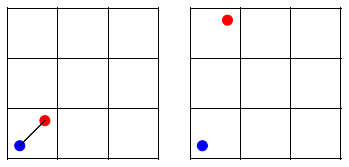

In [38]:
# coordinates 3 points already up
all_points = [points_1, points_2, points_3]

v=N1-1
actual=all_points[v]

all_configurations_ls =[]
all_totalnum_ls=[]

config = [p for p in [*itertools.product(*actual)]] # all possible ways of combining the coordinate sets 
configuration=[]
for elem in config: # make tuple into list
    l = list(elem)
    configuration.append(l)
totalnum = len(configuration)
    
def figure_first_sub():
    a3.plot()
    a3.axis('scaled')
    a3.axis('off')
    a3.set_xlim(-0.5, M1+0.53)
    a3.set_ylim(-0.53, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        a3.axvline(x=xc, color='black', linewidth=1)
        a3.axhline(y=xc, color='black', linewidth=1)
    
def figure_second_sub():
    b3.plot()
    b3.axis('scaled')
    b3.axis('off')
    b3.set_xlim(-0.5, M1+0.53)
    b3.set_ylim(-0.53, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        b3.axvline(x=xc, color='black', linewidth=1)
        b3.axhline(y=xc, color='black', linewidth=1)
        
def figure_third_subplot():
    c3.plot()
    c3.axis('scaled')
    c3.axis('off')
    c3.set_xlim(-0.5, M1+0.53)
    c3.set_ylim(-0.53, M1+0.51)
    start = -0.5
    stop = M1+1
    step = 1
    float_range_array = np.arange(start, stop, step)
    xcoords = list(float_range_array)
    for xc in xcoords:
        c3.axvline(x=xc, color='black', linewidth=1)
        c3.axhline(y=xc, color='black', linewidth=1)
        
def particle_1(subpl):
    e = configuration[0]
    for t1_ls in e:
        circle = plt.Circle((t1_ls[0], t1_ls[1]) ,0.1 , color='r')
        subpl.add_patch(circle) # plot particles
        
        
def i3_3l(subpl):
    e3 = configuration[0]
    xyA=e3[0]
    xyB=e3[1]
    xyC=e3[2]
    coordsA = 'data'
    j = 0
    for t3_ls in e3:
        colo = ['b', 'r', 'k']
        circle = plt.Circle((t3_ls[0], t3_ls[1]) ,0.1 , color=colo[j])
        subpl.add_patch(circle) # plot particles
        line1 = mpatches.ConnectionPatch(xyA,xyB,coordsA)
        line2 = mpatches.ConnectionPatch(xyA,xyC,coordsA)
        line3 = mpatches.ConnectionPatch(xyC,xyB,coordsA)
        subpl.add_artist(line1)
        subpl.add_artist(line2)
        subpl.add_artist(line3)
        j += 1

def i3_2l(subpl):
    e2 = configuration[2]
    xyA2 = e2[0]
    xyB2 = e2[1]
    coordsA = 'data'
    j = 0
    for t3_ls in e2:
        colo = ['b', 'r', 'k']
        circle = plt.Circle((t3_ls[0], t3_ls[1]) ,0.1 , color=colo[j])
        subpl.add_patch(circle) # plot particles
        line = mpatches.ConnectionPatch(xyA2,xyB2,coordsA)
        subpl.add_artist(line)
        j += 1

def i3_1l(subpl):
    e1 = configuration[11]
    j = 0
    for t3_ls in e1:
        colo = ['b', 'r', 'k']
        circle = plt.Circle((t3_ls[0], t3_ls[1]) ,0.1 , color=colo[j])
        subpl.add_patch(circle) # plot particles
        j += 1
        
def i2_2l(subpl):
    e2 = configuration[0]
    xyA2 = e2[0]
    xyB2 = e2[1]
    coordsA = 'data'
    coordsA = 'data'
    j = 0
    for t3_ls in e2:
        colo = ['b', 'r', 'k']
        circle = plt.Circle((t3_ls[0], t3_ls[1]) ,0.1 , color=colo[j])
        subpl.add_patch(circle) # plot particles
        line = mpatches.ConnectionPatch(xyA2,xyB2,coordsA)
        subpl.add_artist(line)
        j += 1

def i2_1l(subpl):
    e2 = configuration[2]
    xyA2 = e2[0]
    xyB2 = e2[1]
    coordsA = 'data'
    j = 0
    for t3_ls in e2:
        colo = ['b', 'r', 'k']
        circle = plt.Circle((t3_ls[0], t3_ls[1]) ,0.1 , color=colo[j])
        subpl.add_patch(circle) # plot particles
        j += 1

        
if N1==1:
    fig3 , a3 = plt.subplots()
    figure_first_sub()
    particle_1(a3)
elif N1==2:
    fig3 , (a3,b3) = plt.subplots(1,2)
    figure_first_sub()
    figure_second_sub()
    i2_2l(a3)
    i2_1l(b3)
    print('In the following plot, we can see 2 possible cases: 1 particle per lattice site or all 2 particles per lattice site')
else:
    fig3 , (a3,b3,c3) = plt.subplots(1,3)
    figure_first_sub()
    figure_second_sub()
    figure_third_subplot()
    i3_3l(a3)
    i3_2l(b3)
    i3_1l(c3)
    print('In the following plot, we can see 3 possible cases: 1 particle per lattice site, 2 particles per lattice site and all 3 particles on the same site')

plt.show()

If visible, the black line represents the interaction between the particles.

<div class="alert alert-block alert-danger">
The interaction energy is given by $$ \sum_{n=1}^{l} \Delta\epsilon(l-n) $$ <br> where <br> - $l$ is the number of particles on the same lattice site (for 1 configuration) <br> - $ \Delta\epsilon $ is the interaction energy

To calculate the interaction energy, you must therefore choose the number of particles on the same lattice site $ l $

We therefore need to choose the number of particles which are on the __same__ lattice site

In [39]:
print('We choose to consider the %d-particle case and thereafter, we choose the number of particles on the same lattice site' %N1)

if N1 == 2:
    l2 = widgets.Dropdown(options=['1','2'], value='2', description='particles #')
    display(l2)
elif N1 ==3:
    l3 = widgets.Dropdown(options=['1','2','3'], value='2', description='particles #')
    display(l3)
elif N1 == 4:
    l4 =widgets.Dropdown(options=['1','2','3','4'], value='2', description='particles #')
    display(l4)
else:
    print('Warning: You have chosen to condifer a 1-particle system so there can be maximum 1 particle per site.')

We choose to consider the 2-particle case and thereafter, we choose the number of particles on the same lattice site


Dropdown(description='particles #', index=1, options=('1', '2'), value='2')

We can illustrate the interaction between the 2 particles on the same lattice site this way:


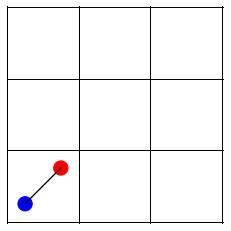

In [41]:
if N1 == 2:
    new = l2.value
    l = int(new)
elif N1 == 3:
    new3 = l3.value
    l = int(new3)
elif N1 == 4:
    new4 = l4.value
    l = int(new4)
else:
    l = 1

print('We can illustrate the interaction between the %d particles on the same lattice site this way:'%l)    

fig4 , a3 = plt.subplots() # plots the graph with chosen N and l
figure_first_sub()

if N1 == 1:
    particle_1(a3)
    print('There is no interaction as only 1 particle')

if N1 == 3:
    if l==1:
        i3_1l(a3)
    elif l==2:
        i3_2l(a3)
    else:
        i3_3l(a3)
    plt.show()

if N1==2:
    if l==1:
        i2_1l(a3)
    else:
        i2_2l(a3)
    plt.show()

## Interaction energy calculation

In [42]:
def int_energy(l): # defines the function to calculate the interaction energy
    l1=[]
    d_e = 1
    def inside(l,n):
        return (l-n)
    delta_e = sum([inside(l,i)*d_e for i in range(1,l+1)])
    return delta_e
int_energy(l)
y_interaction_E = []
r = int_energy(l)
y_interaction_E.append(r)
print('The interaction energy is equal to %d delta_e' %r)

The interaction energy is equal to 1 delta_e


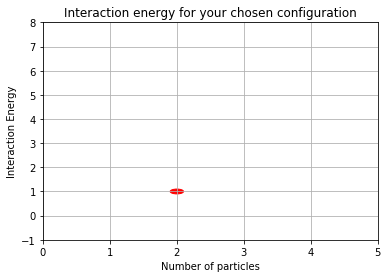

For a system with N=2 particles and l=2 particles on the same lattice site


In [43]:
# Graphical representation of the interaction energy
x_N = []
x_N.append(N1)

fig5, z1 = plt.subplots()
z1.title.set_text('Interaction energy for your chosen configuration')
z1.plot()
z1.grid()
z1.set_xlabel('Number of particles')
z1.xaxis.set_major_locator(MultipleLocator(1))
z1.set_ylabel('Interaction Energy')
z1.set_xlim(0,5)
z1.set_ylim(-1,8)
circle = plt.Circle((x_N[0], y_interaction_E[0]) ,0.1 , color='r')
z1.add_patch(circle)
plt.show()

print('For a system with N=%d particles and l=%d particles on the same lattice site'%(N1,l))

Task: __The parameters can be changed to find the different values of the interaction energy.__

Alternatively, here is the complete graph: 

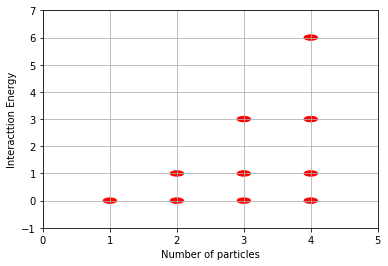

In [44]:
# Considering 1,2,3 and 4 particles
N_list = [*range(1,5)]

all_y=[]
all_x=[]
for N2 in N_list:
    l_list = [*range(1,N2+1)]
    for l2 in l_list:
        all_x.append(N2)
        int_energy(l2)
        all_y.append(int_energy(l2))
        
fig6, all_e = plt.subplots()
all_e.plot()
all_e.grid()
all_e.set_xlabel('Number of particles')
all_e.xaxis.set_major_locator(MultipleLocator(1))
all_e.set_ylabel('Interacttion Energy')
all_e.set_xlim(0,5)
all_e.set_ylim(-1,7)
for ti,to in zip(all_x,all_y):
    circle = plt.Circle((ti, to) ,0.1 , color='r')
    all_e.add_patch(circle)
plt.show()    

# The total energy of the system

However, the interaction energy is not the only energy present in the system. Each particle has an intrinsic energy which can then be added to the interaction energy to form the __total energy of the system__ <br>
We choose a value for the intrinsic energy of the particle (=2)

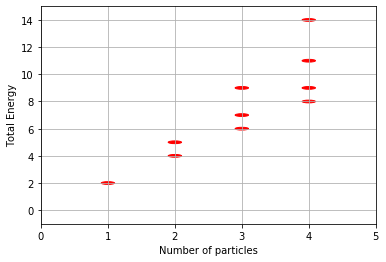

In [45]:
# ADDING NORMAL ENERGY
def particle_energy(N2): # defining the particle's intrinsic energy
    energy = N2*2
    return energy

def total_energy(): # adding the 2 energies to find the total energy
    totalenergy = particle_energy(N2)+int_energy(l2)
    return totalenergy

#c = total_energy()

N_list = [*range(1,5)]

all_y=[]
all_x=[]

for N2 in N_list:
    l_list = [*range(1,N2+1)]
    for l2 in l_list:
        a = particle_energy(N2)
        b = int_energy(l2)
        total_energy()
        all_y.append(total_energy())
        all_x.append(N2)

fig7, all_e = plt.subplots()
all_e.plot()
all_e.grid()
all_e.set_xlabel('Number of particles')
all_e.xaxis.set_major_locator(MultipleLocator(1))
all_e.set_ylabel('Total Energy')
all_e.set_xlim(0,5)
all_e.set_ylim(-1,15)
for ti,to in zip(all_x,all_y):
    circle = plt.Circle((ti, to) ,0.1 , color='r')
    all_e.add_patch(circle)
plt.show()
